In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip install ISLP
%pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 25.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=882c0cae1f235c347c2e63c52eed82459c805a87e23ed5117131a5ee4ca9364d
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstall

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ISLP
import statsmodels.api as sm

In [5]:
!pwd

/content


# **Q8**

In [7]:
auto = pd.read_csv("./Auto.csv")

In [8]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [10]:
auto_hp = auto[auto["horsepower"] != "?"]
auto_hp["horsepower"].astype(str).astype(float).astype(int)

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 392, dtype: int64

In [127]:
X = pd.DataFrame({'intercept': np.ones(auto_hp.shape[0]), 'horsepower': auto_hp['horsepower']})
x = np.asarray(X, dtype=np.float64)
y = np.asarray(auto_hp["mpg"], dtype=np.float64)
model = sm.OLS(y, x)
results = model.fit()

In [116]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           7.03e-81
Time:                        22:50:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
x1            -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
c = np.repeat(np.array([98]), len(y))
check = sm.OLS(y, c)
check = check.fit()
check.conf_int(alpha=0.05)

array([[0.23133548, 0.24715265]])

In [96]:
check.predict().mean()

23.445918367346945

i) F-statistic is much larger than 1 and Prob(F-statistic) is almost 0 (order e-91). Thus there is a significant relationship between mpg and horsepower.

ii)R-squared value = 0.649 = 1-(RSS/TSS). According to this model, 0.649% of the mpg variance is directly correlated to the horsepower.

iii)Negative, x1 coefficient is negative.

iv) See cell 94 and 96 respectively.

In [128]:
x = np.asarray(auto_hp['horsepower'], dtype=np.float64)

In [124]:
# Creating vectors X and Y
xr = np.linspace(0, 225, 200)
yr = 39.9359 - 0.1578*xr

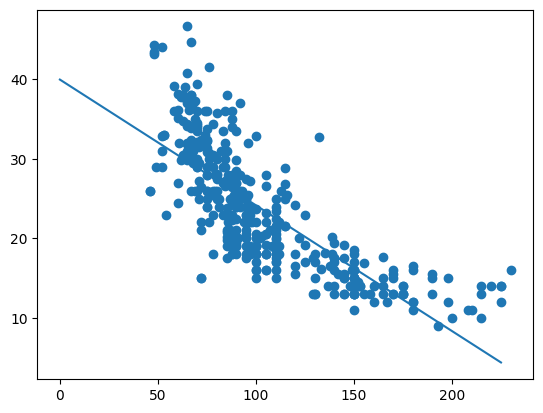

In [130]:
from statsmodels.graphics.regressionplots import abline_plot

# scatter-plot data
ax = plt.scatter(x, y)

# plot regression line
# abline_plot(model_results=model.fit(), ax=ax)
plt.plot(xr, yr)

# **Q9**

In [70]:
Auto = pd.read_csv("./Auto.csv")

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='di

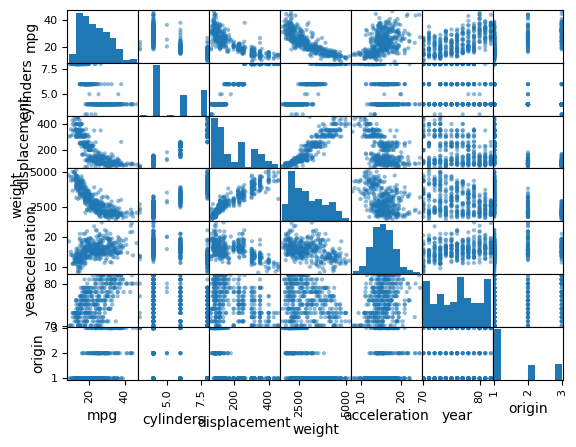

In [71]:
pd.plotting.scatter_matrix(Auto)

In [72]:
Auto.corr()

<ipython-input-72-df4f2c2346fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


In [79]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [100]:
Auto_cleaned = Auto
for col in Auto_cleaned.columns:
  Auto_cleaned = Auto_cleaned[Auto_cleaned[col] != "?"]
  if col != "name":
    Auto_cleaned[col].astype(str).astype(float).astype(int)


In [101]:
X = pd.DataFrame({'intercept': np.ones(Auto_cleaned.shape[0]), 'horsepower': Auto_cleaned['horsepower'],
'cylinders': Auto_cleaned['cylinders'], 'displacement': Auto_cleaned['displacement'], 'weight': Auto_cleaned['weight'], 'acceleration': Auto_cleaned['acceleration'], 'year': Auto_cleaned['year'], 'origin': Auto_cleaned['origin']})

In [112]:
inp = np.asarray(X, dtype=np.float64)
out = np.asarray(Auto_cleaned["mpg"], dtype=np.float64)
model = sm.OLS(out, inp)
results = model.fit()

In [113]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          2.04e-139
Time:                        22:46:58   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2184      4.644     -3.707      0.000     -26.350      -8.087
x1            -0.0170      0.014     -1.230      0.220      -0.044       0.010
x2            -0.4934      0.323     -1.526      0.128      -1.129       0.142
x3             0.0199      0.008      2.647      0.008       0.005       0.035
x4            -0.0065      0.001     -9.929      0.000      -0.008      -0.005
x5             0.0806      0.099      0.815      0.415      -0.114       0.275
x6             0.7508      0.051     14.729      0.000       0.651       0.851
x7             1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
from statsmodels.stats.anova import anova_lm

In [110]:
anova_lm(model)

AttributeError: ignored

i) Yes the R2 value is about 0.82

ii) cylinders, years, and origin (x2, x6, x7)

iii) Coefficient is 0.7508, implying a positive correlation between the year and the mfg variable.